In [1]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\venug\OneDrive\black-box\Projects\ML\CNN_dataset\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [5]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


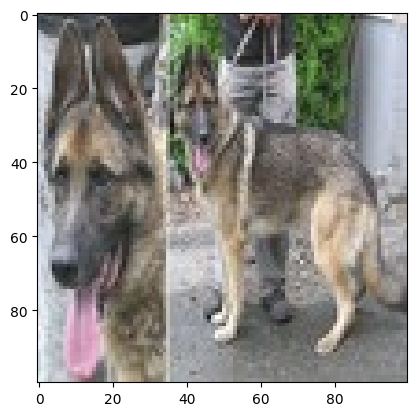

In [6]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

c:\Users\venug\OneDrive\black-box\Projects\ML\CNN_dataset\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train)//32,
    epochs=30,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.5046 - loss: 0.7038 - val_accuracy: 0.5625 - val_loss: 0.6928
Epoch 2/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4375 - loss: 0.6926

c:\Users\venug\OneDrive\black-box\Projects\ML\CNN_dataset\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 0.6926 - val_accuracy: 0.5500 - val_loss: 0.6929
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5122 - loss: 0.6936 - val_accuracy: 0.5150 - val_loss: 0.6880
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4062 - loss: 0.7352 - val_accuracy: 0.5750 - val_loss: 0.6898
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.5036 - loss: 0.6937 - val_accuracy: 0.4975 - val_loss: 0.6928
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.6922 - val_accuracy: 0.4975 - val_loss: 0.6928
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.5152 - loss: 0.6920 - val_accuracy: 0.6525 - val_loss: 0.6855
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.6901 - val_accuracy: 0.6300 - val_loss: 0.6852
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.5224 - loss: 0.6907 - val_accuracy: 0.6575 - val_loss: 0

In [14]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5000 - loss: 0.6933


[0.6932640075683594, 0.5]

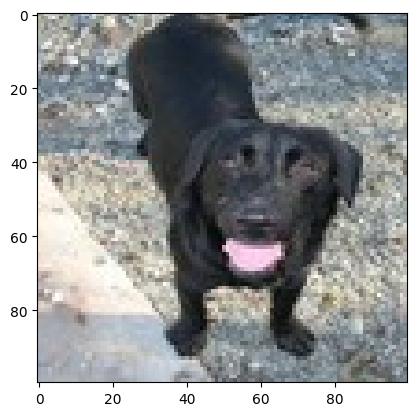

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Our model says it is a:  dog


In [16]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)

In [17]:
# ...existing code...
model.save('model.h5')
print("saved model to disk")
# ...existing code...

saved model to disk




This corrects the syntax error in your last cell. Replace the problematic lines with the above code and run the cell. Your model will be saved and the confirmation message will be printed.